### **1. Make classification and get it ready**

In [2]:
import sklearn

from sklearn.datasets import make_circles

# Make 1000 samples 
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f'First 5 samples of X: \n {X[:5]}')
print(f'First 5 samples of y:\n {y[:5]}')

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
X.shape, y.shape, X.ndim, y.ndim

((1000, 2), (1000,), 2, 1)

In [6]:
X[:5, :]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [7]:
X[:5, : 1]

array([[ 0.75424625],
       [-0.75615888],
       [-0.81539193],
       [-0.39373073],
       [ 0.44220765]])

In [8]:
X[:5, 1:]

array([[ 0.23148074],
       [ 0.15325888],
       [ 0.17328203],
       [ 0.69288277],
       [-0.89672343]])

In [9]:
X[:5, :].ndim, X[:5, : 1].ndim, X[:5, 1:].ndim

(2, 2, 2)

In [10]:
X[:5, 0].ndim, X[:5, 1].ndim, X[:5, 0].ndim

(1, 1, 1)

In [11]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({'X1' : X[:, 0], 
                        'X2' : X[:, 1],
                        'label': y})
circles.head(5)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [12]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

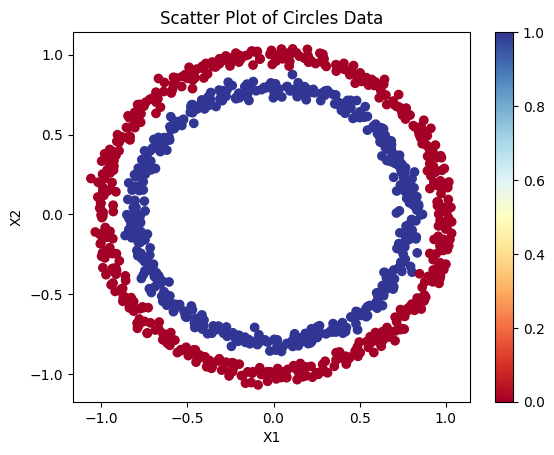

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0], y = X[:, 1], c = y,cmap='RdYlBu')
plt.colorbar()  # Add a colorbar to show the mapping of colors
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Circles Data')
plt.show()

In [14]:
X.shape, y.shape

((1000, 2), (1000,))

In [16]:
X_sample = X[0]
y_sample = y[0]

print(f'Values of one sample of X: {X_sample} \nand the same for y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape} \nand the same for y: {y_sample.shape}')

Values of one sample of X: [0.75424625 0.23148074] 
and the same for y: 1
Shapes for one sample of X: (2,) 
and the same for y: ()


In [17]:
import torch
torch.__version__

'2.6.0+cpu'

In [18]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [19]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [20]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [21]:
# split data into training and test sets 
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state = 42)

In [22]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 800, 200, 200)